# Exploración de datos — Airbnb
**Notebook:** exploracion_airbnb.ipynb  
**Objetivo:** análisis exploratorio para entender estructura, calidad y distribución de `listings`, `reviews`, `calendar`.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.width', 140)

In [9]:
# Cargar los datasets comprimidos (.gz)
listings = pd.read_csv("../data/listings.csv.gz", compression='gzip')
reviews = pd.read_csv("../data/reviews.csv.gz", compression='gzip')
calendar = pd.read_csv("../data/calendar.csv.gz", compression='gzip')

# Confirmar que se cargaron
print("Datos cargados correctamente:")
print(f"Listings: {listings.shape}")
print(f"Reviews: {reviews.shape}")
print(f"Calendar: {calendar.shape}")

Datos cargados correctamente:
Listings: (26401, 79)
Reviews: (1388226, 6)
Calendar: (9636365, 7)


In [15]:
# Mostrar primeras filas
print("== LISTINGS HEAD ==")
display(listings.head())

print("\n== REVIEWS HEAD ==")
display(reviews.head())

print("\n== CALENDAR HEAD ==")
display(calendar.head())

# Cantidad de registros y columnas
print("\nShapes:")
print("listings:", listings.shape)
print("reviews:", reviews.shape)
print("calendar:", calendar.shape)

# Tipos de datos (info)
print("\nListados info():")
listings.info()

== LISTINGS HEAD ==


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_clean,last_review_dt
0,35797,https://www.airbnb.com/rooms/35797,20250625031918,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, cocineta, y baño completo.","Santa Fe Shopping Mall, Interlomas Park and the Lion's Desert are very close to here.",https://a0.muscache.com/pictures/f395ab78-1185-451e-8121-b93b2999f916.jpg,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Marketing\n@School of Fine Arts Of Boston ,Harvard University , Anahuac university, San Idelfonso, La esmeralda. ;)\nLOve arts, science & culture \n",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/00de11fb-90ce-4d82-bcbe-4c2c2789c9f7.jpg?aki_policy=profile_small,https://a0.muscache.com/im/pictures/user/00de11fb-90ce-4d82-bcbe-4c2c2789c9f7.jpg?aki_policy=profile_x_medium,NaN,1.0,1.0,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,NaN,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Kitchen"", ""Resort access"", ""Hot water"", ""Courtyard view"", ""Indoor fireplace"", ""Bed linens"", ""Garden view"", ""Free parking on premises"", ""Wifi"", ""Pocket wifi"", ""Washer"", ""BBQ grill""]","$3,799.00",1,7,1.0,1.0,7.0,7.0,1.0,7.0,NaN,t,29,59,89,364,2025-06-26,0,0,0,188,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN,3799.0,NaT
1,44616,https://www.airbnb.com/rooms/44616,20250625031918,2025-07-01,city scrape,Condesa Haus,"A new concept of hosting in mexico through a blend of art, comfort and technology, all at the Condesa, the most famous and trendy neighborhood in Mexico City.<br />The house has 5 rooms with priva...",NaN,https://a0.muscache.com/pictures/251410/ec75fe83_original.jpg,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent studios and aparments,within an hour,100%,91%,f,https://a0.muscache.com/im/users/196253/profile_pic/1315928046/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/196253/profile_pic/1315928046/original.jpg?aki_policy=profile_x_medium,Condesa,13.0,13.0,"['email', 'phone', 'work_email']",t,t,NaN,Cuauhtémoc,NaN,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.5 baths,5.0,8.0,"[""Free street parking"", ""Free parking on premises"", ""Exterior security cameras on property"", ""Hangers"", ""Essentials"", ""Microwave"", ""Wifi"", ""Washer"", ""Dryer"", ""TV"", ""Dishes and silverware"", ""Hair d...","$18,000.00",1,180,1.0,1.0,180.0,180.0,1.0,180.0,NaN,t,29,59,89,36


== REVIEWS HEAD ==


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10257549,59265221,2016-01-08,31043833,Karolis,"The flat is very nice newly renovated. The host is very friendly, helps wherever he can. We asked for a heater which he immediatly organized for us. The area is not the safest for late walks but t..."
1,10257549,59352234,2016-01-09,7248934,James,"Benito and his wife were great guests. Perfect for an overnight layover. The 45 peso breakfast is very good, well worth the price."
2,10257549,59456981,2016-01-10,52707457,Manuel,"Fue algo express. No pude volar y contacté con Benito quien estuvo pendiente de mi, pasó por mí en el aeropuerto y fue muy gentil en todo momento. Juana, me preparo una cena muy rica y su atención..."
3,10257549,59661086,2016-01-13,52989229,Annie,"This was a very comfortable and conveniently located place to stay in the beautiful mexico city. The proximity to the airport, the bus station, and subways was very convenient. Also, Benito and hi..."
4,10257549,59806795,2016-01-15,51159033,Svenja,"Nice place, really close to te airport - Nice furnishing and a modern bathroom. Recommendable."



== CALENDAR HEAD ==


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,35797,2025-06-26,f,NaN,NaN,1,7
1,35797,2025-06-27,t,NaN,NaN,1,7
2,35797,2025-06-28,t,NaN,NaN,1,7
3,35797,2025-06-29,t,NaN,NaN,1,7
4,35797,2025-06-30,t,NaN,NaN,1,7



Shapes:
listings: (26401, 81)
reviews: (1388226, 6)
calendar: (9636365, 7)

Listados info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            26401 non-null  int64         
 1   listing_url                                   26401 non-null  object        
 2   scrape_id                                     26401 non-null  int64         
 3   last_scraped                                  26401 non-null  object        
 4   source                                        26401 non-null  object        
 5   name                                          26401 non-null  object        
 6   description                                   25633 non-null  object        
 7   neighborhood_overview                         13970 no

# Información general sobre los datos:

**Listings**
                     
- Anuncios activos: 26.401.
- Número de columnas: 79.

**Calendar**
                     
- Número de filas: 9.636.365.
- Cada fila representa un día específico para un anuncio.

**Reviews**
                     
- Reseñas: 1.388.226.

Se encuentran muchos NaN en las columnas opcionales.
Para el analisis se mantienen las columnas útiles y se descartan las irrelevantes.
                     
- Identificación (*id, host_id, name*).
- Ubicación (*neighbourhood_cleansed, latitude, longitude*).
- Tipo de propiedad (*property_type, room_type, accommodates, bedrooms, beds, bathrooms*).
- Precio (*price, estimated_revenue_l365d, estimated_occupancy_l365d*).
- Disponibilidad (*availability_30, availability_365, minimum_nights, maximum_nights*).
- Reseñas (*number_of_reviews, review_scores_rating*).
- Host (*host_is_superhost, host_listings_count*).


In [16]:
# Mostrar nulos y % nulos
def missing_report(df, top_n=20):
    miss = df.isna().sum().sort_values(ascending=False)
    pct = (miss / len(df) * 100).round(2)
    return pd.concat([miss, pct], axis=1, keys=["missing_count", "missing_pct"]).head(top_n)

print("Missing report - listings")
display(missing_report(listings))

print("Missing report - reviews")
display(missing_report(reviews))

print("Missing report - calendar")
display(missing_report(calendar))

# Duplicados
print("Duplicados generales:")
print("listings duplicated rows:", listings.duplicated().sum())
print("reviews duplicated rows:", reviews.duplicated().sum())
print("calendar duplicated rows:", calendar.duplicated().sum())

# Duplicados por clave
if "_id" in listings.columns:
    print("listings duplicated by _id:", listings["_id"].duplicated().sum())
if "id" in reviews.columns:
    print("reviews duplicated by id:", reviews["id"].duplicated().sum())


Missing report - listings


,missing_count,missing_pct
neighbourhood_group_cleansed,26401,100.00
calendar_updated,26401,100.00
license,26401,100.00
host_neighbourhood,12831,48.60
neighborhood_overview,12431,47.09
neighbourhood,12431,47.09
host_about,11237,42.56
host_location,6237,23.62
host_response_rate,4686,17.75
host_response_time,4686,17.75


Missing report - reviews


,missing_count,missing_pct
comments,183,0.01
reviewer_name,12,0.00
listing_id,0,0.00
id,0,0.00
date,0,0.00
reviewer_id,0,0.00


Missing report - calendar


,missing_count,missing_pct
price,9636365,100.0
adjusted_price,9636365,100.0
listing_id,0,0.0
date,0,0.0
available,0,0.0
minimum_nights,0,0.0
maximum_nights,0,0.0


Duplicados generales:
listings duplicated rows: 0
reviews duplicated rows: 0
calendar duplicated rows: 0
reviews duplicated by id: 0


# Calidad general

**Listings**

- Las columnas *calendar_updated, eighbourhood_group_cleansed, license* están vacías al 100%, no aportan información por lo que pueden ser descartadas.
- Las columnas *host_neighbourhood (49%), neighbourhood (47%), neighbourhood (47%), host_about ()43%* solo tienes al rededor del 40% de los valores faltantes, solo pueden ser útiles para el análisis cualitativo, pero no para el cuantitativo.
- Las columnas *host_location, host_response_rate, host_response_time, host_acceptance_rate, review_scores_* tienen entre el 10% y 25% de valores faltantes, esto nos indica que algunos anfitriones no tienen reseñas o no han completado la información de su perfil, y que las puntuaciones deben ser usadas con cuidado.

**Reviews**

- Los valores faltantes son mínimos y no tiene duplicados.
- Gracias a que el dataset es bastante limpio se puede contar cantidad de reseñas por anuncios, ver la distribución temporal y analizar la satisfacción del cliente.

**Calendar**

- No tiene duplicados.
- Las columnas *price y adjusted_price* están 100% nulas, debido a esto no se pueden analizar los precios diarios.
- Las demás columnas están completas por lo que se podrían usar para calcular las tasas de ocupación, por ejemplo usando *available*.

In [17]:
import re

def clean_price_column(series):
    def clean_val(x):
        if pd.isna(x):
            return np.nan
        s = str(x)
        s = re.sub(r'[^\d\.-]', '', s) 
        if s == "":
            return np.nan
        try:
            return float(s)
        except:
            return np.nan
    return series.apply(clean_val)

if "price" in listings.columns:
    listings["price_clean"] = clean_price_column(listings["price"])
    print("Precio - conteo nulos:", listings["price_clean"].isna().sum())
else:
    print("No se encontró columna 'price' en listings.")

date_candidates = [c for c in listings.columns if "date" in c.lower() or "review" in c.lower() or "last_review" == c]
if "last_review" in listings.columns:
    listings["last_review_dt"] = pd.to_datetime(listings["last_review"], errors="coerce")
    print("last_review - nulos después de parseo:", listings["last_review_dt"].isna().sum())

Precio - conteo nulos: 3274
last_review - nulos después de parseo: 3373


In [18]:
# Estadísticas numéricas
cols_interest = []
if "price_clean" in listings.columns:
    cols_interest.append("price_clean")
if "minimum_nights" in listings.columns:
    cols_interest.append("minimum_nights")
if "availability_365" in listings.columns:
    cols_interest.append("availability_365")

print("Descriptivas columnas de interés:")
display(listings[cols_interest].describe().T)

# Percentiles específicos para price
if "price_clean" in listings.columns:
    pct = listings["price_clean"].dropna().quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
    print("Percentiles price_clean:")
    display(pct)


Descriptivas columnas de interés:


,count,mean,std,min,25%,50%,75%,max
price_clean,23127.0,1989.292472,18500.684915,66.0,630.0,1039.0,1647.0,900000.0
minimum_nights,26401.0,4.837014,25.627984,1.0,1.0,2.0,2.0,1125.0
availability_365,26401.0,234.647248,124.290787,0.0,142.0,269.0,348.0,365.0


Percentiles price_clean:


0.01      218.0
0.05      329.0
0.25      630.0
0.50     1039.0
0.75     1647.0
0.95     3970.0
0.99    10000.0
Name: price_clean, dtype: float64

# Estadísticas básicas

**Precio**

- Media: 1.989.
- Mediana: 1.039.
- Desviación estándar: 18,500.
- Mínimo: 66.
- Máximo: 900,000.

La mayoría de precios están en rangos bajos y medios, pero hay algunos de lujo, que se pueden identificar gracias a los percentiles, serían los que están mas allá de los 4000.

**Mínimo de noches**

- Media: 4.8
- Mediana: 2
- Máximo: 1.125

Con esto podríamos entender que la mayoría de los anfitriones piden entre 1 y 2 noches mínimas.

**Disponibilidad**

- Media: 243 días.
- Mediana: 269 días.
- Mínimo: 0.
- Máximo: 365.

En promedio los alojamientos están disponibles el 64% del año.

**Resumen general:**

- Es un mercado muy heterogéneo ya que tiene precios desde los 66 hasta los 900.000.
- Precio típico esta entre 600 y 1,600 por noche.
- La mayoría de los alojamientos permiten estancias cortas (1–2 noches).
- La disponibilidad promedio esta en 235 días, con una ocupación aproximada del 36%.

In [19]:
def detect_outliers_iqr(series, k=1.5):
    s = series.dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return lower, upper

if "price_clean" in listings.columns:
    lower, upper = detect_outliers_iqr(listings["price_clean"])
    print(f"IQR bounds price_clean: lower={lower}, upper={upper}")
    outliers = listings[(listings["price_clean"] < lower) | (listings["price_clean"] > upper)]
    print("Outliers count (IQR rule):", len(outliers))
    display(outliers[["price_clean", "name", "id"]].head(10))

if "price_clean" in listings.columns:
    print("Precios > 1000 count:", (listings["price_clean"] > 1000).sum())


IQR bounds price_clean: lower=-895.5, upper=3172.5
Outliers count (IQR rule): 1752


,price_clean,name,id
0,3799.0,Villa Dante,35797
1,18000.0,Condesa Haus,44616
6,4071.0,BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec,165772
11,4144.0,Luxury Loft-Style Apartment in Vibrant Polanco Neighborhood,1288566
16,3232.0,HOUSE INDIGO IN THE CEN. OF MEX CITY,1403218
25,3609.0,GREAT HOUSE IN S MIGUEL CHAPULTEPEC,256555
55,10500.0,Hermosa Casa en Condesa - 6 Habitaciones,375032
70,3951.0,Suites Havre-Departamento Col. Juárez,458808
72,4470.0,"Deluxe 4-BR penthouse, views, historic center",499553
79,3181.0,Amazing apartment Mexico City!!!,2075738


Precios > 1000 count: 11966


# Outliers (valores atípicos)

**IQR (Interquartile Range)**

IQR=Q3−Q1
se usa para detectar los valores atípicos en la distribución.

**Límites calculados**

- Inferior = -895.5 (Los precios no pueden ser negativos, no tiene relevancia).

- Superior = 3172.5 (Los anuncios con este precio se consideran outlier).

**Outliers count**

- Son 1752, significa que hay bastantes precios inflados o excepcionales.
- Corresponden a las propiedades costosas, como las villas, las lujosas los penthouses, entre otros.

IQR bounds price_clean: lower=-895.5, upper=3172.5


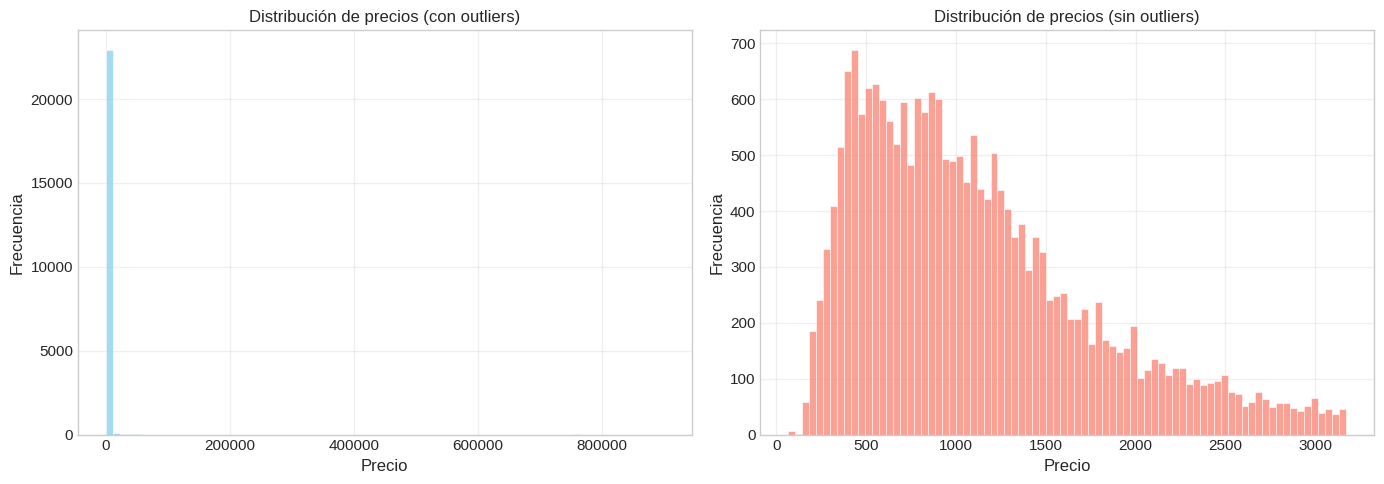

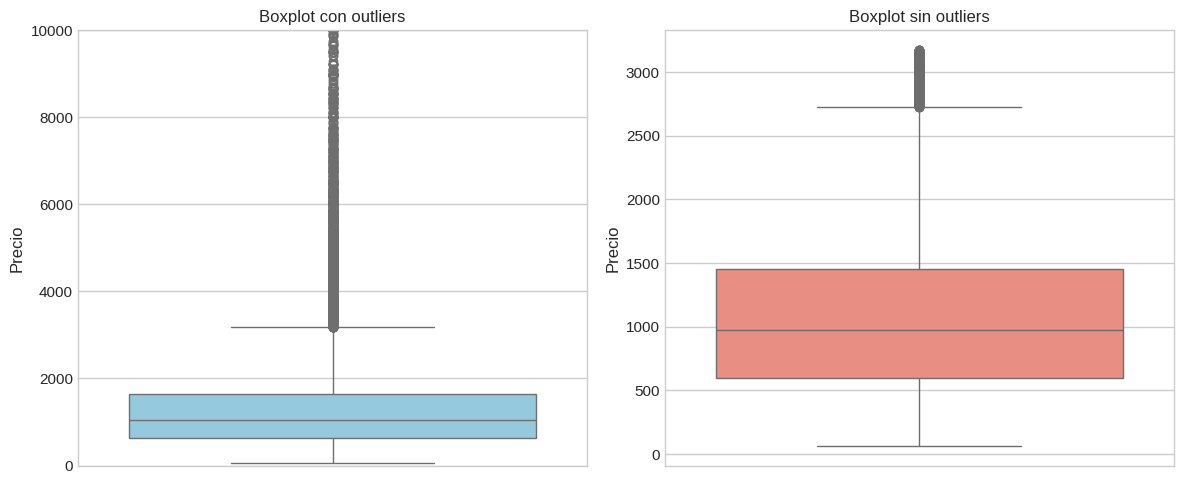

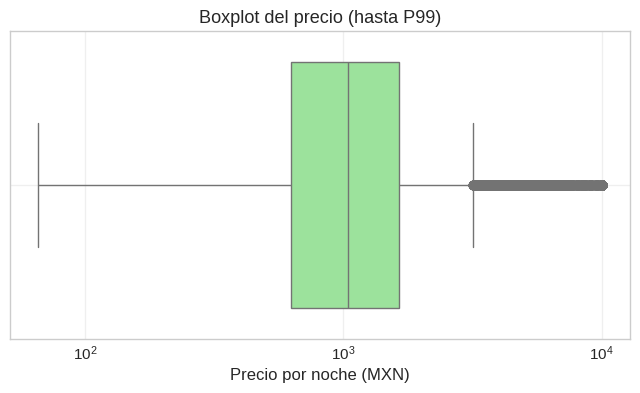

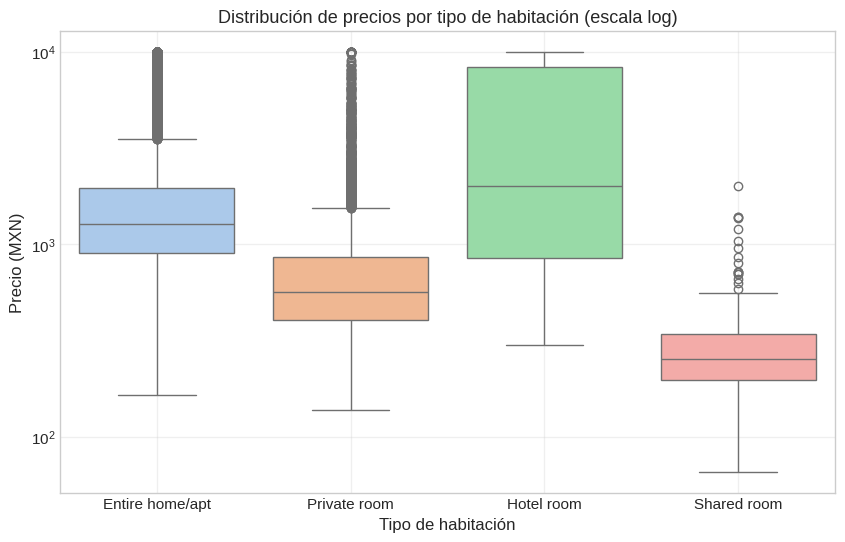

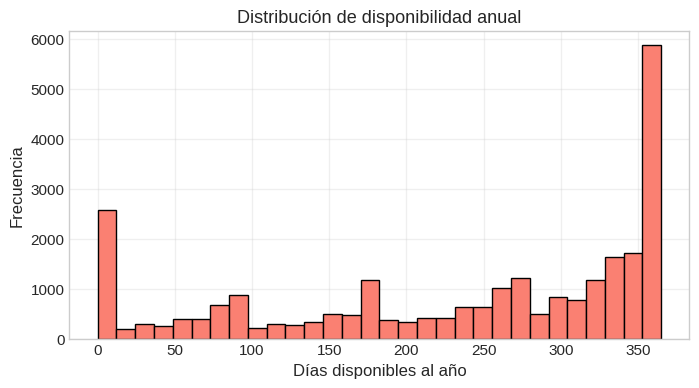

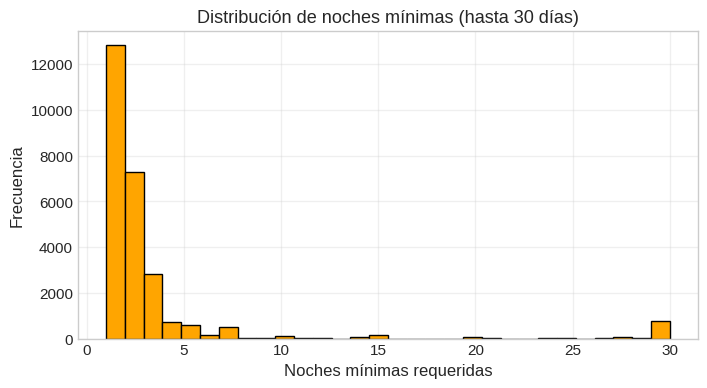

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if "price_clean" in listings.columns:
    listings["price_clean"] = listings["price_clean"].replace([np.inf, -np.inf], np.nan)

# Histograma de precios (price_clean)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = listings.copy()

Q1 = data["price_clean"].quantile(0.25)
Q3 = data["price_clean"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"IQR bounds price_clean: lower={lower:.1f}, upper={upper:.1f}")

data_no_outliers = data[(data["price_clean"] >= lower) & (data["price_clean"] <= upper)]

plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Histograma con outliers ---
sns.histplot(
    data=data,
    x="price_clean",
    bins=80,
    color="skyblue",
    ax=axes[0]
)
axes[0].set_title("Distribución de precios (con outliers)", fontsize=12)
axes[0].set_xlabel("Precio")
axes[0].set_ylabel("Frecuencia")
axes[0].grid(alpha=0.3)

# --- Histograma sin outliers ---
sns.histplot(
    data=data_no_outliers,
    x="price_clean",
    bins=80,
    color="salmon",
    ax=axes[1]
)
axes[1].set_title("Distribución de precios (sin outliers)", fontsize=12)
axes[1].set_xlabel("Precio")
axes[1].set_ylabel("Frecuencia")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(
    data=data,
    y="price_clean",
    ax=axes[0],
    color="skyblue"
)
axes[0].set_title("Boxplot con outliers")
axes[0].set_ylabel("Precio")
axes[0].set_ylim(0, data["price_clean"].quantile(0.99))  # limitar eje Y

sns.boxplot(
    data=data_no_outliers,
    y="price_clean",
    ax=axes[1],
    color="salmon"
)
axes[1].set_title("Boxplot sin outliers")
axes[1].set_ylabel("Precio")

plt.tight_layout()
plt.show()


# Boxplot general del precio
if "price_clean" in listings.columns:
    plt.figure(figsize=(8,4))
    data = listings["price_clean"].dropna().clip(upper=listings["price_clean"].quantile(0.99))
    sns.boxplot(x=data, color="lightgreen")
    plt.title("Boxplot del precio (hasta P99)", fontsize=13)
    plt.xlabel("Precio por noche (MXN)")
    plt.xscale('log')
    plt.grid(alpha=0.3)
    plt.show()

# Boxplot por tipo de habitación
if "room_type" in listings.columns and "price_clean" in listings.columns:
    plt.figure(figsize=(10,6))
    data = listings.copy()
    # Asegurar que la columna existe y no tenga valores nulos
    data = data[["room_type", "price_clean"]].dropna()
    data["price_clean"] = data["price_clean"].clip(upper=data["price_clean"].quantile(0.99))
    
    sns.boxplot(data=data, x="room_type", y="price_clean", hue="room_type",  palette="pastel", legend=False)
    plt.yscale('log')
    plt.title("Distribución de precios por tipo de habitación (escala log)", fontsize=13)
    plt.xlabel("Tipo de habitación")
    plt.ylabel("Precio (MXN)")
    plt.grid(alpha=0.3)
    plt.show()

# Histograma de disponibilidad (availability_365)
if "availability_365" in listings.columns:
    plt.figure(figsize=(8,4))
    plt.hist(listings["availability_365"].dropna(), bins=30, color="salmon", edgecolor="black")
    plt.title("Distribución de disponibilidad anual", fontsize=13)
    plt.xlabel("Días disponibles al año")
    plt.ylabel("Frecuencia")
    plt.grid(alpha=0.3)
    plt.show()

# Histograma de noches mínimas (minimum_nights)
if "minimum_nights" in listings.columns:
    plt.figure(figsize=(8,4))
    data = listings["minimum_nights"].dropna().clip(upper=30)
    plt.hist(data, bins=30, color="orange", edgecolor="black")
    plt.title("Distribución de noches mínimas (hasta 30 días)", fontsize=13)
    plt.xlabel("Noches mínimas requeridas")
    plt.ylabel("Frecuencia")
    plt.grid(alpha=0.3)
    plt.show()


Columnas numéricas de interés: ['minimum_nights', 'availability_365', 'number_of_reviews', 'price_clean']


,minimum_nights,availability_365,number_of_reviews,price_clean
minimum_nights,1.000000,-0.023146,-0.056013,0.006337
availability_365,-0.023146,1.000000,0.037005,0.016794
number_of_reviews,-0.056013,0.037005,1.000000,-0.021911
price_clean,0.006337,0.016794,-0.021911,1.000000


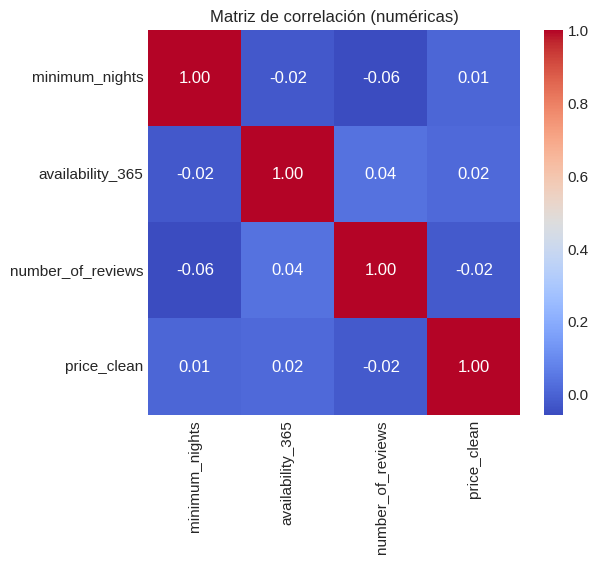

In [21]:
# Correlación numérica
num_cols = [c for c in listings.columns if listings[c].dtype in [np.float64, np.int64]]
num_cols = [c for c in num_cols if c in ["price_clean", "minimum_nights", "availability_365", "number_of_reviews"]]
print("Columnas numéricas de interés:", num_cols)
if len(num_cols) > 1:
    display(listings[num_cols].corr())

    plt.figure(figsize=(6,5))
    sns.heatmap(listings[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Matriz de correlación (numéricas)")
    plt.show()


# Interpretación general

- Todas las correlaciones son bajas, están entre -0.06 y +0.04.
- Esto nos demuestra que las variables numéricas (*minimum_nights, availability_365, number_of_reviews, price_clean*) no están linealmente relacionadas.

Podríamos concluir que esto ocurre con Airbnb porque:

- El precio depende más de la ubicación y tipo de alojamiento que del número de reseñas o noches mínimas.
- *availability_365* varía mucho por temporada y no guarda una tendencia clara con el precio.

In [22]:
# REVIEWS: timing y frecuencia por listing
if "date" in reviews.columns and "listing_id" in reviews.columns:
    reviews["date_dt"] = pd.to_datetime(reviews["date"], errors="coerce")
    reviews_count = reviews.groupby("listing_id").size().rename("n_reviews").reset_index()
    display(reviews_count.describe())

# CALENDAR: disponibilidad por fecha
if "date" in calendar.columns and "available" in calendar.columns:
    calendar["date_dt"] = pd.to_datetime(calendar["date"], errors="coerce")
    # ejemplo: agregación mensual de disponibilidad
    calendar['month'] = calendar['date_dt'].dt.to_period('M')
    availability = calendar.groupby('month')['available'].apply(lambda s: (s=='t').mean() if s.dtype=='O' else np.nan).reset_index()
    display(availability.head())


,listing_id,n_reviews
count,2.302800e+04,23028.000000
mean,6.185619e+17,60.284263
std,5.360219e+17,85.901173
min,4.461600e+04,1.000000
25%,4.181966e+07,8.000000
50%,7.466119e+17,28.000000
75%,1.108165e+18,78.000000
max,1.450299e+18,1342.000000


,month,available
0,2025-06,0.332197
1,2025-07,0.553696
2,2025-08,0.692618
3,2025-09,0.733697
4,2025-10,0.678146


# Estadísticas generales

**Reseñas por alojamiento *n_reviews***

- Hay 23 mil alojamientos con reseñas registradas.
- En promedio, cada alojamiento tiene 60 reseñas.
- Algunos alojamientos tienen muy pocas y otros cientos.
- El 75 % de los alojamientos tiene menos de 78 reseñas; pocos superan las 100.

Con esto podríamos concluir que el hecho de que la mayoría de los alojamientos tenga pocas reseñas, podría indicar que hay una base grande de clientes nuevos o poco frecuentes.

**Disponibilidad mensual *available***

- La disponibilidad aumenta de junio a septiembre, siendo 73% el punto mas alto, luego baja en octubre.
- Hay menor ocupación después de verano.
- Muestra un patrón estacional.

## Sugerencias de transformación (basado en resultados anteriores)

- Normalizar `price` a `float`, eliminar símbolos. (hecho: price_clean)
- Tratar outliers: capear al percentil 99 o eliminar registros por negocio (precios > $X).
- Imputación de nulos:
  - `last_review`: dejar nulos si no hay review (puede ser informativo).
  - Otras columnas con >50% nulos: considerar eliminación.
- Duplicados: eliminar filas con `_id` duplicado.
- Amenities: expandir top N amenities a columnas binarias.
- Convertir `available` en calendar a boolean (t/f -> 1/0).
- Convertir `date` a `YYYY-MM-DD` y derivar `year`, `month`, `day`, `quarter`.

In [25]:
listings_summary = listings.describe(include='all').transpose()
listings_summary.to_csv("../data/listings_summary.csv")

missing = missing_report(listings, top_n=200)
missing.to_csv("../data/listings_missing_report.csv")

cols_for_transform = [
    "_id", "id", "name", "host_id", "room_type",
    "price_clean", "minimum_nights", "availability_365",
    "last_review_dt", "number_of_reviews"
]
available_cols = [c for c in cols_for_transform if c in listings.columns]
listings[available_cols].to_csv("../data/listings_pretransform_sample.csv", index=False)

print("Archivos guardados correctamente en la carpeta data/")

Archivos guardados correctamente en la carpeta data/


In [27]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from scr.transformacion import Transformacion
import pandas as pd

listings = pd.read_csv("../data/listings_pretransform_sample.csv")

tf = Transformacion(listings)

tf.limpiar_duplicados()
tf.limpiar_nulos(["last_review_dt", "name"])
tf.normalizar_precios("price_clean")
tf.convertir_fechas("last_review_dt")
tf.derivar_columnas_fecha("last_review_dt")

tf.guardar_csv("../data/listings_limpio.csv")
print("Archivos generados:")
print(os.listdir("../data"))

Archivos generados:
['calendar.csv.gz', 'listings.csv.gz', 'listings_limpio.csv', 'listings_missing_report.csv', 'listings_pretransform_sample.csv', 'listings_summary.csv', 'reviews.csv.gz']
